In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt

plotting.setup_mpl()

In [2]:
session = ff1.get_session(2023, 'Miami', 'Q')
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
C:\Users\Imran\anaconda3\lib\site-packages\fastf1\core.py:1411: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
C:\Users\Imran\anaconda3\lib\site-packages\fastf1\core.py:1411: FutureWarning: The frame.append method is deprecated and will be remove

In [3]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
per_lap = session.laps.pick_driver('PER').pick_fastest()

ver_lap = ver_lap.get_car_data().add_distance()
per_lap = per_lap.get_car_data().add_distance()

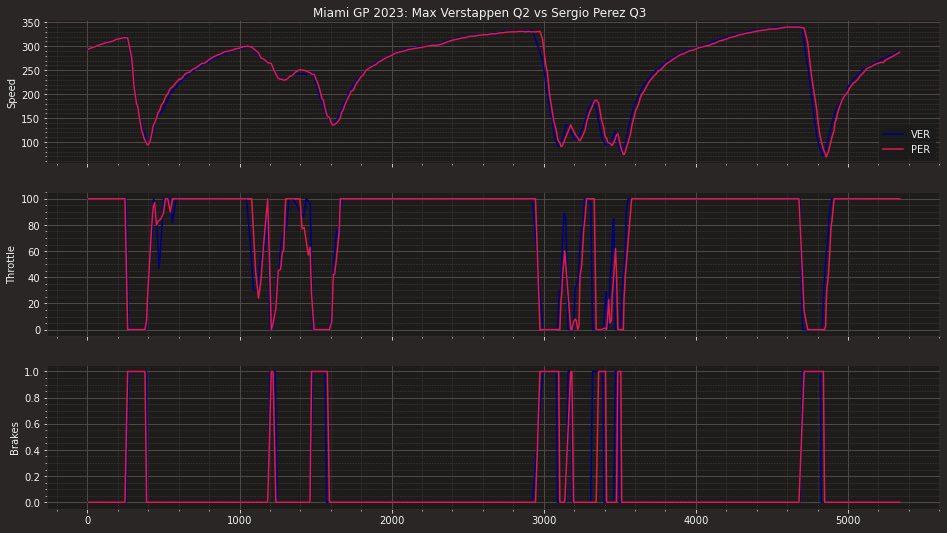

In [4]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("Miami GP 2023: Max Verstappen Q2 vs Sergio Perez Q3", y=0.9)

ax[0].plot(ver_lap['Distance'], ver_lap['Speed'], color='navy', label='VER')
ax[0].plot(per_lap['Distance'], per_lap['Speed'], color='#E21B4D', label='PER')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ver_lap['Distance'], ver_lap['Throttle'], color='navy', label='VER')
ax[1].plot(per_lap['Distance'], per_lap['Throttle'], color='#E21B4D', label='PER')
ax[1].set(ylabel='Throttle')

ax[2].plot(ver_lap['Distance'], ver_lap['Brake'], color='navy', label='VER')
ax[2].plot(per_lap['Distance'], per_lap['Brake'], color='#E21B4D', label='PER')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [5]:
fig.savefig('Max Verstappen Q2 vs Sergio Perez Q3 Qualifying Lap Miami 2023.png', dpi = 350)